In [25]:
import pandas as pd
#import geopandas
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm, trange
import numpy as np

In [26]:
# New York Counties
fips = ['36061','36047','36005','36085','36081']

In [27]:
def filter_fips(df, fips=fips):
    return df[df['cbg'].astype(str).str[:5].isin(fips)]

In [28]:
# def get_fips(fname, filepath, fips, dirout):
#     df = pd.read_csv(filepath, compression='gzip', dtype={'origin_census_block_group': object})
#     df = df.rename(columns={'origin_census_block_group':'cbg'})
#     df = filter_fips(df)
#     df.to_csv(dirout)

In [29]:
path = 'C:\\Users\\Admin\\Documents\\BigDataProject\\2020\\'



all_files = os.listdir(path)

li = []
j = 0

for i in range(len(all_files)):
    try :
        df = filter_fips(pd.read_csv(path+all_files[i], dtype={'cbg': object},index_col=None, header=0,engine='python'))
        li.append(df)
    except Exception as e:
        print(e)
        pass
#     if j > 100 :
#         break
#     j += 1

    
df = pd.concat(li, axis=0, ignore_index=True)



NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead


In [30]:
'The total number of rows in the social distancing data for 2020 are {}'.format(df.shape[0])

'The total number of rows in the social distancing data for 2020 are 2290780'

In [31]:
df

,Unnamed: 0,cbg,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,...,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home,mean_home_dwell_time,mean_non_home_dwell_time,mean_distance_traveled_from_home
0,146,360470064002,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,66,5731.0,"{""16001-50000"":1,""0"":28,"">50000"":3,""2001-8000""...","{""16001-50000"":174,"">50000"":268,""<1000"":97,""20...",28,795,...,"{""360610089003"":1,""360470138001"":3,""3606101250...",1,14,123,"{""21-45"":1,""481-540"":1,""541-600"":1,""46-60"":1,""...",96,"{"">100"":3,""0-25"":15,""76-100"":37,""51-75"":7}",NaN,NaN,NaN
1,154,360810384001,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,69,4820.0,"{""16001-50000"":6,""0"":22,"">50000"":7,""2001-8000""...","{""16001-50000"":61,"">50000"":541,""<1000"":17,""200...",22,853,...,"{""360810515001"":1,""360810366002"":1,""3605941350...",2,51,130,"{""21-45"":1,""481-540"":1,""46-60"":3,""721-840"":3,""...",96,"{""26-50"":1,""51-75"":1,""0-25"":17,"">100"":1,""76-10...",NaN,NaN,NaN
2,155,360850170103,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,219,4298.0,"{""16001-50000"":29,""0"":77,"">50000"":5,""2001-8000...","{""16001-50000"":101,"">50000"":600,""<1000"":200,""2...",78,1116,...,"{""360470551003"":1,""360610029003"":1,""3604701400...",1,66,332,"{""21-45"":16,""481-540"":3,""541-600"":1,""46-60"":8,...",93,"{""26-50"":10,""51-75"":21,""0-25"":27,"">100"":9,""76-...",NaN,NaN,NaN
3,393,360050213021,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,65,3458.0,"{""16001-50000"":3,""0"":29,"">50000"":3,""2001-8000""...","{""16001-50000"":25,"">50000"":70,""<1000"":21,""2001...",29,865,...,"{""360050295001"":1,""360610184001"":1,""3606102270...",2,5,150,"{""21-45"":3,""481-540"":2,""541-600"":1,""<20"":34,""6...",99,"{""26-50"":2,""51-75"":2,""0-25"":12,"">100"":7,""76-10...",NaN,NaN,NaN
4,394,360050253004,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,36,3160.0,"{""16001-50000"":1,""0"":12,"">50000"":4,""2001-8000""...","{""16001-50000"":143,"">50000"":104,""<1000"":65,""20...",12,729,...,"{""360610052001"":1,""360050213021"":1,""3600502270...",1,30,88,"{""21-45"":2,""481-540"":1,""301-360"":1,""<20"":17,""6...",83,"{""0-25"":9,""76-100"":21,""51-75"":3,""26-50"":1}",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290775,218950,360810466001,2020-12-31T00:00:00-05:00,2021-01-01T00:00:00-05:00,86,1334.0,"{""16001-50000"":5,""0"":41,"">50000"":3,""2001-8000""...","{""16001-50000"":58,"">50000"":141,""<1000"":21,""200...",34,834,...,"{""360810236001"":1,""360810208001"":1,""3608112650...",2,37,192,"{""21-45"":5,""481-540"":3,""541-600"":4,""721-840"":2...",96,"{""0-25"":22,""76-100"":52,""51-75"":9,""26-50"":1}",748.0,239.0,3276.0
2290776,218951,360811008021,2020-12-31T00:00:00-05:00,2021-01-01T00:00:00-05:00,92,297.0,"{""16001-50000"":14,""0"":38,"">50000"":1,""2001-8000...","{""16001-50000"":83,"">50000"":20,""<1000"":73,""2001...",37,744,...,"{""360594110005"":1,""360470394003"":1,""3608100860...",1,16,164,"{""21-45"":4,""481-540"":3,""541-600"":1,""46-60"":1,""...",98,"{""0-25"":20,""76-100"":59,""51-75"":10,""26-50"":3}",726.0,224.0,3021.0
2290777,219123,360050145002,2020-12-31T00:00:00-05:00,2021-01-01T00:00:00-05:00,36,211.0,"{""1-1000"":12,""1001-2000"":4,""2001-8000"":2,""0"":16}","{""1001-2000"":126,""2001-8000"":12,""<1000"":107}",17,455,...,"{""360610236001"":1,""360050145004"":5,""3600501770...",1,6,90,"{""21-45"":1,""481-540"":1,""541-600"":1,""721-840"":1...",99,"{""0-25"":7,""76-100"":27,""51-75"":1,""26-50"":1}",638.0,174.0,233.0
2290778,219127,360810185011,2020-12-31T00:00:00-05:00,2021-01-01T00:00:00-05:00,22,1367.0,"{""16001-50000"":1,""0"":8,"">50000"":3,"

In [32]:
# Selecting the columsn that we need for the analysis
devices_mobility = df[['date_range_start','cbg','device_count','completely_home_device_count','part_time_work_behavior_devices','full_time_work_behavior_devices']]

In [33]:
#Renaming columns
devices_mobility = devices_mobility.rename(columns={'date_range_start':'date','device_count':'total', 'completely_home_device_count':'completely_home','part_time_work_behavior_devices':'part_time_work', 'full_time_work_behavior_devices':'full_time_work'})

In [34]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work
0,2020-01-01T00:00:00-05:00,360470064002,66,28,1,1
1,2020-01-01T00:00:00-05:00,360810384001,69,22,4,1
2,2020-01-01T00:00:00-05:00,360850170103,219,78,6,4
3,2020-01-01T00:00:00-05:00,360050213021,65,29,3,1
4,2020-01-01T00:00:00-05:00,360050253004,36,12,2,1
...,...,...,...,...,...,...
2290775,2020-12-31T00:00:00-05:00,360810466001,86,34,4,1
2290776,2020-12-31T00:00:00-05:00,360811008021,92,37,4,2
2290777,2020-12-31T00:00:00-05:00,360050145002,36,17,1,1
2290778,2020-12-31T00:00:00-05:00,360810185011,22,10,1,1


In [35]:
#Listing out the device count columns
device_columns = ['completely_home','part_time_work','full_time_work']

In [36]:
#Calculating percentage for all the device columns
for column in device_columns :
    devices_mobility['precentage_'+column]= devices_mobility.apply(lambda row: row[column]/row['total']*100 if row['total']!=0 else 0, axis=1)


In [37]:
#Normalising the percentage columns
for column in device_columns:
        devices_mobility['norm_'+column] = (devices_mobility['precentage_'+ column] - devices_mobility['precentage_'+column].mean()) / devices_mobility['precentage_'+column].std()

In [38]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
0,2020-01-01T00:00:00-05:00,360470064002,66,28,1,1,42.424242,1.515152,1.515152,0.307029,-0.984668,-0.851741
1,2020-01-01T00:00:00-05:00,360810384001,69,22,4,1,31.884058,5.797101,1.449275,-0.435985,-0.095365,-0.867012
2,2020-01-01T00:00:00-05:00,360850170103,219,78,6,4,35.616438,2.739726,1.826484,-0.172876,-0.730340,-0.779572
3,2020-01-01T00:00:00-05:00,360050213021,65,29,3,1,44.615385,4.615385,1.538462,0.461491,-0.340791,-0.846338
4,2020-01-01T00:00:00-05:00,360050253004,36,12,2,1,33.333333,5.555556,2.777778,-0.333820,-0.145531,-0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...
2290775,2020-12-31T00:00:00-05:00,360810466001,86,34,4,1,39.534884,4.651163,1.162791,0.103349,-0.333361,-0.933422
2290776,2020-12-31T00:00:00-05:00,360811008021,92,37,4,2,40.217391,4.347826,2.173913,0.151461,-0.396360,-0.699035
2290777,2020-12-31T00:00:00-05:00,360050145002,36,17,1,1,47.222222,2.777778,2.777778,0.645256,-0.722437,-0.559053
2290778,2020-12-31T00:00:00-05:00,360810185011,22,10,1,1,45.454545,4.545455,4.545455,0.520646,-0.355315,-0.149290


In [39]:
#Converting date column to datetime object 
devices_mobility['date']= pd.to_datetime(devices_mobility['date'],utc= True)

In [40]:
#Adding month column for further usage
devices_mobility['month'] = devices_mobility['date'].dt.month

In [41]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
0,2020-01-01 05:00:00+00:00,360470064002,66,28,1,1,42.424242,1.515152,1.515152,0.307029,-0.984668,-0.851741,1
1,2020-01-01 05:00:00+00:00,360810384001,69,22,4,1,31.884058,5.797101,1.449275,-0.435985,-0.095365,-0.867012,1
2,2020-01-01 05:00:00+00:00,360850170103,219,78,6,4,35.616438,2.739726,1.826484,-0.172876,-0.730340,-0.779572,1
3,2020-01-01 05:00:00+00:00,360050213021,65,29,3,1,44.615385,4.615385,1.538462,0.461491,-0.340791,-0.846338,1
4,2020-01-01 05:00:00+00:00,360050253004,36,12,2,1,33.333333,5.555556,2.777778,-0.333820,-0.145531,-0.559053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290775,2020-12-31 05:00:00+00:00,360810466001,86,34,4,1,39.534884,4.651163,1.162791,0.103349,-0.333361,-0.933422,12
2290776,2020-12-31 05:00:00+00:00,360811008021,92,37,4,2,40.217391,4.347826,2.173913,0.151461,-0.396360,-0.699035,12
2290777,2020-12-31 05:00:00+00:00,360050145002,36,17,1,1,47.222222,2.777778,2.777778,0.645256,-0.722437,-0.559053,12
2290778,2020-12-31 05:00:00+00:00,360810185011,22,10,1,1,45.454545,4.545455,4.545455,0.520646,-0.355315,-0.149290,12


In [42]:
#Grouping data on basis of month value
grouped_dm = devices_mobility.groupby([devices_mobility['month']]).mean()

In [43]:
grouped_dm

,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
month,,,,,,,,,,
1,56.747442,15.731918,5.235401,4.372121,27.152249,9.372379,7.942775,-0.769546,0.647172,0.638240
2,60.324868,16.804988,5.292050,4.085750,27.244239,8.859695,6.987120,-0.763061,0.540694,0.416710
3,57.413595,21.522013,3.796671,3.051230,38.200698,6.793587,5.693950,0.009297,0.111592,0.116942
4,53.385405,29.499757,1.776196,1.560461,54.043534,4.047668,3.708108,1.126113,-0.458698,-0.343394
5,55.731906,28.235325,1.977632,1.620823,49.802733,4.288053,3.745494,0.827165,-0.408774,-0.334728
6,54.955332,23.980395,2.416256,1.845153,42.533010,5.061646,4.173453,0.314697,-0.248109,-0.235523
7,53.642778,21.457478,2.609792,1.925425,38.356485,5.569414,4.469662,0.020279,-0.142652,-0.166859
8,56.267639,22.633664,2.698432,1.951091,35.769230,5.844539,4.651017,-0.162105,-0.085513,-0.124819
9,52.261083,18.865013,2.888580,2.195664,35.339143,6.287344,5.160846,-0.192424,0.006452,-0.006637


<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

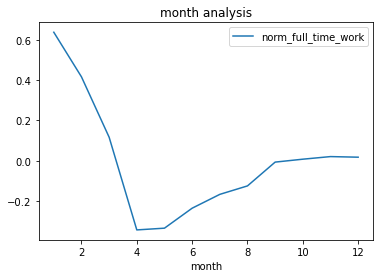

In [44]:
#Plotting the normalised trend for full_time_work population for each month
grouped_dm.plot.line( title="month analysis", y = "norm_full_time_work")

<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

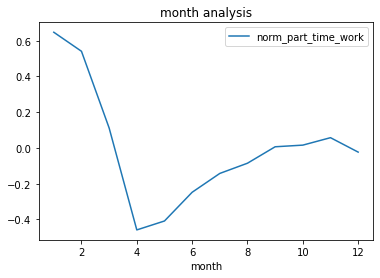

In [45]:
#Plotting the normalised trend for part_time_work population for each month
grouped_dm.plot.line( title="month analysis", y = "norm_part_time_work")

<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

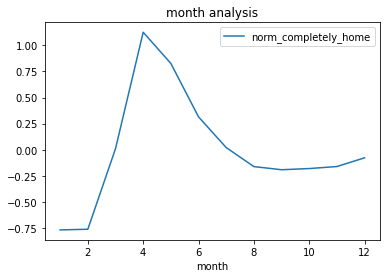

In [46]:
#Plotting the normalised trend for completely home population for each month
grouped_dm.plot.line( title="month analysis", y = "norm_completely_home")